In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
col_names = ['line', 'direction', 'station_diva_id', 'date', 'should_arrive_at', 
              'actually_arrived_at', 'next_station_diva_nach']

In [3]:
targetStationId = 2572

In [4]:
stationDS = pd.read_csv('data/generated/station_' + str(targetStationId) + '.csv')

In [5]:
stationDS['delayrank'] = pd.cut(stationDS.delays,
                     bins=[-1, 60, 120, 201],
                     labels=["Low", "Medium", "High"])
stationDS.head()

,actually_arrived_at,date,delays,direction,line,next_station_diva_nach,should_arrive_at,station_diva_id,delayrank
0,16832,2019-04-14,32.0,1,12,3447,16800,2572,Low
1,18190,2019-04-14,136.0,2,14,3447,18054,2572,High
2,18293,2019-04-14,11.0,1,10,2151,18282,2572,Low
3,18332,2019-04-14,8.0,1,62,3154,18324,2572,Low
4,18415,2019-04-14,31.0,1,75,694,18384,2572,Low


In [6]:
stationDS.isna().sum()

actually_arrived_at       0
date                      0
delays                    0
direction                 0
line                      0
next_station_diva_nach    0
should_arrive_at          0
station_diva_id           0
delayrank                 0
dtype: int64

Data types of the columns

In [7]:
stationDS.dtypes
# stationDS.date.unique()

actually_arrived_at          int64
date                        object
delays                     float64
direction                    int64
line                         int64
next_station_diva_nach       int64
should_arrive_at             int64
station_diva_id              int64
delayrank                 category
dtype: object

In [8]:
ds = stationDS.copy()
# ds = ds.loc[(ds['line'] == 8) | (ds['line'] == 10) | (ds['line'] == 75)]

[8, 10, 11, 12, 14, 15, 17, 61, 62, 75, 94]


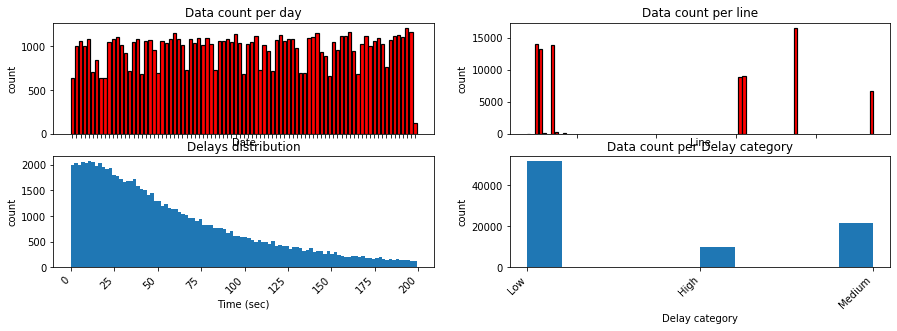

In [9]:
#Plotting graphs

# fig, ax = plt.subplots()
# ax.set_title('Data count per day')
# ax.set_ylabel('count')
# ax.plot(count_per_day.index, count_per_day.line)
# ax.margins(x=0, y=0)

# plt.hist(ds.date)
# plt.ylabel('Data count per day');


# Set up the plotting layout
fig, ((ax1, ax2), (ax21, ax22)) = plt.subplots(nrows=2, ncols=2, figsize = (15,5))
fig.autofmt_xdate(rotation = 45)

ax1.set_xlabel('Date'); ax1.set_ylabel('count'); ax1.set_title('Data count per day')
# ax1.hist(ds.date)
count_per_day = ds.groupby('date').count()
ax1.bar(count_per_day.index, count_per_day.line, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);


ax2.set_xlabel('Line'); ax2.set_ylabel('count'); ax2.set_title('Data count per line')
# ax2.hist(ds.line);
count_per_line = ds.groupby('line').count()
ax2.bar(count_per_line.index, count_per_line.date, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);
lines = ds.line.unique()
print(sorted(lines))
# plt.xticks(count_per_line.index, count_per_line['index'].apply(str), rotation='vertical')

# fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (15,5))
# fig.autofmt_xdate(rotation = 45)

ax21.set_xlabel('Time (sec)'); ax21.set_ylabel('count'); ax21.set_title('Delays distribution')
ax21.hist(ds.delays, bins=100);
# ax1.scatter(delays, delays);
# count_per_line = ds.groupby('line').count()
# ax2.bar(count_per_line.index, count_per_line.date, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);

ax22.set_xlabel('Delay category'); ax22.set_ylabel('count'); ax22.set_title('Data count per Delay category')
ax22.hist(ds.delayrank);

In [10]:
# Add column to represent day of week
# ds['date'] = pd.to_datetime(ds['date'])
ds['day_of_week'] = pd.to_datetime(ds['date']).dt.weekday

# split date into day, month, year
ds['day'] = pd.to_datetime(ds['date']).dt.day
ds['month'] = pd.to_datetime(ds['date']).dt.month
# ds['year'] = pd.to_datetime(ds['date']).dt.year

# drop date column because we splitted it
ds = ds.drop('date', axis = 1)

# drop 'actually_arrived_at' column because we have delays now!
ds = ds.drop('actually_arrived_at', axis = 1)

ds = ds.drop('station_diva_id', axis = 1)

ds = ds.drop('delays', axis = 1)

print(ds.shape)
ds.head()
# ds.day_of_week.unique()

(82874, 8)


,direction,line,next_station_diva_nach,should_arrive_at,delayrank,day_of_week,day,month
0,1,12,3447,16800,Low,6,14,4
1,2,14,3447,18054,High,6,14,4
2,1,10,2151,18282,Low,6,14,4
3,1,62,3154,18324,Low,6,14,4
4,1,75,694,18384,Low,6,14,4


In [11]:
labels = ds.delayrank
# convert label (i.e. delayrank) to one-hot-encoding
cat_columns = ["delayrank"]
labels = pd.get_dummies(labels, prefix_sep="__", columns=cat_columns)
# labels.head()

labels_names = list(labels.columns)
# print(labels_names)
# Convert to numpy array
labels = np.array(labels)

In [12]:
tempDS = ds.drop('delayrank', axis = 1)
# tempDS.head()
# tempDS = tempDS.drop('next_station_diva_nach', axis = 1)
# tempDS = tempDS.drop('month', axis = 1)
# tempDS = tempDS.drop('direction', axis = 1)

features = np.array(tempDS)

# Saving feature names for later use
feature_list = list(tempDS.columns)

As there are some 0 in labels so when calculating accuracy, dividing by zero results in infinity, so adding 1 to all labels (i.e. delays). Now, 1 means no delay!

In [13]:
# labels = labels + 1

In [14]:
print(features[:5])
print(labels[:5])

[[    1    12  3447 16800     6    14     4]
 [    2    14  3447 18054     6    14     4]
 [    1    10  2151 18282     6    14     4]
 [    1    62  3154 18324     6    14     4]
 [    1    75   694 18384     6    14     4]]
[[1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [15]:
# delete variables
del ds
del stationDS

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# train_features, test_features, train_labels, test_labels = train_test_split(
#     features, labels, test_size = 0.20, random_state = 42
# );

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size = 0.20, shuffle=False
);

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (66299, 7)
Training Labels Shape: (66299, 3)
Testing Features Shape: (16575, 7)
Testing Labels Shape: (16575, 3)


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [18]:
# Use the forest's predict method on the training data
train_predictions = rf.predict(train_features)
print("[Train] Accuracy:", metrics.accuracy_score(train_labels, train_predictions))

[Train] Accuracy: 0.9998491681624158


In [19]:
# Use the forest's predict method on the test data
test_predictions = rf.predict(test_features)
print("[Test] Accuracy:", metrics.accuracy_score(test_labels, test_predictions))
# print(test_labels[:20])
# print(test_predictions[:20])

[Test] Accuracy: 0.5017194570135747


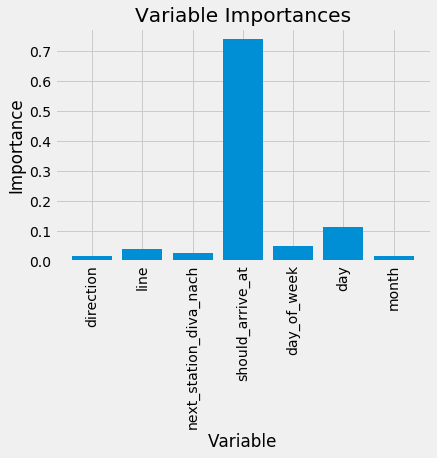

In [20]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');